In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax

import context
from models.bayesian_NN.NN_model import logprior, loglikelihood, init_network
from models.bayesian_NN.NN_data import X_train, y_train, X_test, y_test
from models.bayesian_NN.util import load_NN_MAP, add_noise_NN_params
from util import flatten_param_list

from samplers.timed_sampler import timed_sampler
from sgmcmcjax.kernels import build_sgld_kernel, build_sgldCV_kernel, build_badodab_kernel, build_baoab_kernel, build_sgnht_kernel


# NN


In [2]:

batch_size = int(0.01*X_train.shape[0])
data = (X_train, y_train)


key = random.PRNGKey(0)
Niters = 1000
key, subkey = random.split(key)
params_IC = add_noise_NN_params(subkey, load_NN_MAP(), 0.)
batch_size = int(0.1*X_train.shape[0])
centering_value = load_NN_MAP()

## timed sampler

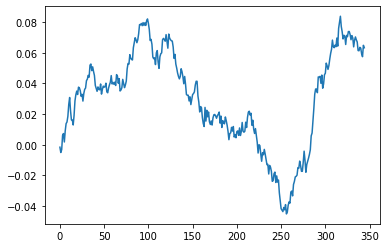

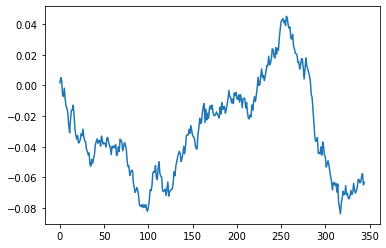

In [4]:
build_timed_sampler = timed_sampler(build_sgld_kernel)

my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size)
samples, mygrads = my_timed_sampler(key, 5, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()


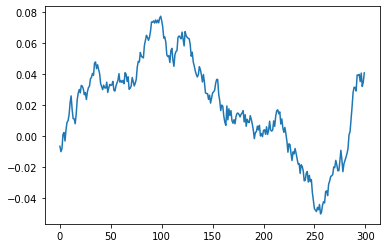

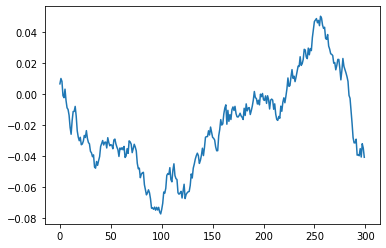

In [4]:
build_timed_sampler = timed_sampler(build_sgldCV_kernel)

my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size, params_IC)
samples, mygrads = my_timed_sampler(key, 1, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()


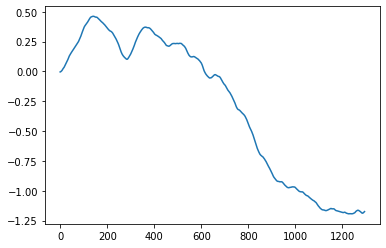

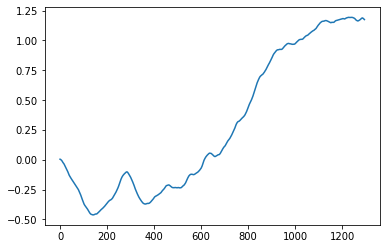

In [6]:
build_timed_sampler = timed_sampler(build_sgnht_kernel)

my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size)
samples, mygrads = my_timed_sampler(key, 3, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()


In [7]:
np.shape(samples)

(1295, 79510)